# Aula 10 - MLP 2

Hoje daremos continuidade ao estudo das redes neurais abordando um assunto prático, a biblioteca Keras:

### - Primeira parte

- Pequena revisão

### - Segunda parte

- Exemplo no Keras

### - Terceira parte

- Tempo para o projeto

# Relembrando...

# MLP - Multi Layer Perceptron

A arquitetura que combina perceptrons em camadas se popularizou como a primeira rede neural de uso genérico. A composição dos neurônios é mostrada na figura a seguir:  

![image-2.png](https://ars.els-cdn.com/content/image/1-s2.0-S2405656118301020-gr1.jpg)

As redes MLP podem ser divididas em 3 partes:

1 - __Primeira camada__: variáveis de entrada. Cada uma das variáveis são alimentadas diretamente na rede;  

2 - __Última camada__: perceptrons com as saídas do modelo;  

3 - __Camadas intermediarias__: também chamadas de camadas ocultas (hidden layers), pode conter uma ou mais camadas de perceptrons.  


Como a expressão matemática do perceptron é relativamente simples, é possível expandir a expressão para toda a rede. Mesmo com poucas camadas, é perceptível como a expressão começa a ficar completamente não interpretável, além de ser de difícil representação. A grande pergunta é: como as redes neurais de fato resolvem os problemas do dia a dia?

# Como as redes aprendem?

Podemos dizer que a tarefa de aprendizado da rede neural é, nada mais nada menos, a atualização dos seus pesos. Para definir qual é o melhor peso, as redes neurais aplicam duas técnicas muito poderosas: o gradiente descendente e o backpropagation.  


## Gradiente Descendente

Vamos utilizar a figura de uma parábola para exemplificar esse algoritmo:  

![image-2.png](https://static.todamateria.com.br/upload/ve/rt/verticeparabola-0.jpg)

O gradiente descendente é um algoritmo iterativo que, a partir de um ponto inicial, utiliza o gradiente da função como base para escolher uma direção de busca do ponto de mínimo. Para cada etapa da iteração, o algoritmo calcula o gradiente e desloca o ponto candidato a mínimo um passo na direção contrária. Dado tempo suficiente, com um passo pequeno o bastante, o algoritmo converge para, pelo menos, um mínimo local. 

## Backpropagation

Assim como nós, as redes neurais aprendem com os erros. Isso não acontece de qualquer maneira: elas aplicam um algoritmo muito poderoso chamado de backpropagation, que consiste em, a partir do cálculo do gradiente da última camada, propagar as atualizações dos parâmetros para as camadas anteriores. Para que isso seja possível, é necessário definir uma __função de custo__ na saída da rede. Em geral, é utilizado o __MSE__ para regressão e a __log-loss__ para classificação.

A sequência de passos que faz a atualização dos pesos é, então:  

1 - Aplica um conjunto de dados de entrada na rede, gerando saídas;  

2 - Calcula o erro comparando as predições com o target real: __mse__ para regressão, __log-loss__ para classificação;  

3 - Aplica o gradiente descendente para atualizar os pesos da última camada;  

4 - Propaga o gradiente para as camadas anteriores, atualizando os pesos camada por camada.  

![image.png](https://s3-sa-east-1.amazonaws.com/lcpi/e17684ac-ea56-4ba9-ac0d-70658fab05c1.png)

#### Glossário:

__batch size__: a quantidade de dados que entram na rede antes de cada atualização dos pesos;

__épocas__: cada época é uma passagem completa por todo o dataset de treinamento;



# Usando o Keras

[Documentação](https://keras.io/)

In [1]:
import pandas as pd
 
base_treino = pd.read_csv('adult_train.csv')

base_treino.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,Private,144752,10th,6,Never-married,Handlers-cleaners,Own-child,Amer-Indian-Eskimo,Male,0,0,20,United-States,<=50K
1,21,Local-gov,402230,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Male,0,0,36,United-States,<=50K
2,41,Private,149576,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
3,29,Private,535978,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
4,54,Private,111469,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

base_treino['income'] = base_treino['income'].map({'<=50K': 0, '>50K': 1})

base_treino = base_treino.dropna()

categ_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X = base_treino[categ_features + num_features]
y = base_treino['income']

# Tratamento das categóricas

X = pd.get_dummies(X, columns=categ_features)

print(X.shape, y.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

# Tratamento numéricas

standard_scaler = StandardScaler()

X_train[num_features] = standard_scaler.fit_transform(X_train[num_features])
X_valid[num_features] = standard_scaler.transform(X_valid[num_features])

X_train.head()

(39074, 91) (39074,)
(27351, 91) (27351,)
(11723, 91) (11723,)


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
31768,-0.560344,-0.031624,-0.145729,-0.215178,-2.052385,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32904,0.241956,1.134584,-0.145729,-0.215178,-0.191903,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1855,0.606637,-0.420359,-0.145729,-0.215178,-0.839027,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
34608,-0.487408,0.745848,-0.145729,-0.215178,1.749469,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4609,1.263064,1.912055,13.476934,-0.215178,0.374330,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
modelo = keras.Sequential(
    [
        layers.Dense(100, input_dim=X_train.shape[1], activation="relu", name="layer1"),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               9200      
                                                                 
 layer2 (Dense)              (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 14,301
Trainable params: 14,301
Non-trainable params: 0
_________________________________________________________________


In [10]:
modelo = keras.Sequential()

modelo.add(layers.Dense(100, input_dim=X_train.shape[1], activation="relu", name="layer1"))
modelo.add(layers.Dense(50, activation="relu", name="layer2"))
modelo.add(layers.Dense(1, activation="sigmoid"))

modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               9200      
                                                                 
 layer2 (Dense)              (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,301
Trainable params: 14,301
Non-trainable params: 0
_________________________________________________________________


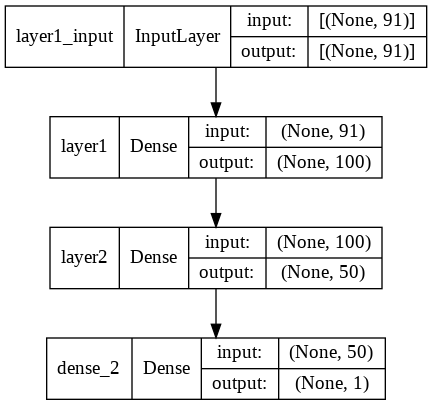

In [11]:
keras.utils.plot_model(modelo, show_shapes=True)

In [12]:
modelo.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [13]:
print("Treino do modelo")
history = modelo.fit(
    X_train.values,
    y_train.values,
    batch_size=200,
    epochs=4,
    validation_data=(X_valid.values, y_valid.values),
)

Treino do modelo
Epoch 1/4
137/137 [==============================] - 1s 3ms/step - loss: 0.3625 - binary_accuracy: 0.8312 - val_loss: 0.3198 - val_binary_accuracy: 0.8521
Epoch 2/4
137/137 [==============================] - 0s 2ms/step - loss: 0.3091 - binary_accuracy: 0.8552 - val_loss: 0.3157 - val_binary_accuracy: 0.8511
Epoch 3/4
137/137 [==============================] - 0s 3ms/step - loss: 0.3046 - binary_accuracy: 0.8578 - val_loss: 0.3148 - val_binary_accuracy: 0.8531
Epoch 4/4
137/137 [==============================] - 0s 3ms/step - loss: 0.3020 - binary_accuracy: 0.8567 - val_loss: 0.3136 - val_binary_accuracy: 0.8517


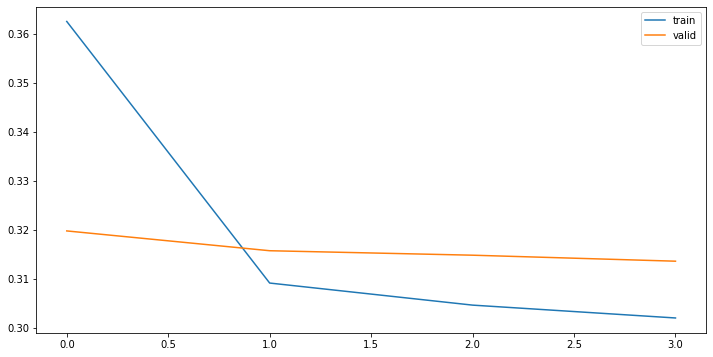

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
# plt.plot(history.history['val_binary_accuracy'], label='acc_valid')

plt.legend()

plt.show()

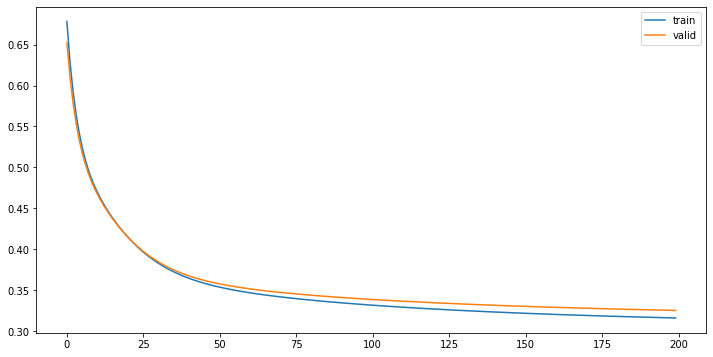

In [251]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
# plt.plot(history.history['val_binary_accuracy'], label='acc_valid')

plt.legend()

plt.show()

In [253]:
y_train_pred = modelo.predict(X_train.values).reshape(-1)

y_valid_pred = modelo.predict(X_valid.values).reshape(-1)

print(y_train_pred.shape, y_valid_pred.shape)

(27351,) (11723,)


In [226]:
def get_prediction(y_predict_proba, corte=0.5):
    y_predict_proba = y_predict_proba.copy()

    mask = (y_predict_proba >= corte)
    y_predict_proba[mask] = 1
    y_predict_proba[~mask] = 0
    
    return y_predict_proba

In [254]:
CORTE = 0.5

y_train_pred = get_prediction(y_train_pred, corte=CORTE)

y_valid_pred = get_prediction(y_valid_pred, corte=CORTE)

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.3f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.3f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.852, Precision: 0.73, Recall: 0.61
Validação:
Acc: 0.848, Precision: 0.72, Recall: 0.60


In [15]:
modelo.save('modelo_renda_v0')

INFO:tensorflow:Assets written to: modelo_renda_v0/assets


In [16]:
modelo_carregado = keras.models.load_model('modelo_renda_v0')

In [17]:
modelo.predict(X_valid.values)

array([[0.52810955],
       [0.05185175],
       [0.00554144],
       ...,
       [0.71399236],
       [0.45886245],
       [0.00729081]], dtype=float32)

----------

# Pra anotar

- Redes neurais MLP são extremamente versáteis e podem ser aplicadas em diversas tarefas de aprendizado supervisionado;

- Perdemos muita interpretabilidade ao utilizar esse tipo de modelo, então dê prefência para algoritmos mais simbólicos, ao menos que o desempenho utilizando MLP seja significativamente maior.